# 데이터 출처

데이터 출처 :https://www.kaggle.com/mczielinski/bitcoin-historical-data

# 첫번째 시도

In [2]:
!wget https://www.kaggle.com/mczielinski/bitcoin-historical-data/download

--2022-01-10 13:14:38--  https://www.kaggle.com/mczielinski/bitcoin-historical-data/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fmczielinski%2Fbitcoin-historical-data%3Fresource%3Ddownload [following]
--2022-01-10 13:14:38--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fmczielinski%2Fbitcoin-historical-data%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download’

download                [ <=>                ]   6.43K  --.-KB/s    in 0s      

2022-01-10 13:14:38 (78.4 MB/s) - ‘download’ saved [6585]



In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whizkid1","key":"2adf2c1496b0adad23e05dae03f985f8"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 88% 88.0M/100M [00:00<00:00, 97.4MB/s]
100% 100M/100M [00:00<00:00, 147MB/s]  


In [6]:
!ls

bitcoin-historical-data.zip  download  kaggle.json  sample_data


In [7]:
!unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


## 데이터 로딩, 전처리 및 결측치 처리

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dfB = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
dfB.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(len(dfB))

4857377


In [19]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [21]:
dfB.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [22]:
dfB2 = dfB.dropna()

In [24]:
dfB2.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [26]:
dfB2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


TImestamp가 Unix time로 측정되어있다.

In [27]:
dfB2.sort_values(by=["Timestamp"])

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [28]:
sorted_index = dfB2.sort_values(by=['Timestamp']).index

In [29]:
print(sorted_index)

Int64Index([      0,     478,     547,     548,    1224,    1896,    2333,
               3612,    4553,    4710,
            ...
            4857366, 4857367, 4857369, 4857370, 4857371, 4857372, 4857373,
            4857374, 4857375, 4857376],
           dtype='int64', length=3613769)


In [30]:
print(sum(sorted_index - dfB2.index))

0


In [31]:
dfB3 = dfB2.drop(columns=["Timestamp"])

## 데이터 값 분포 확인

Open


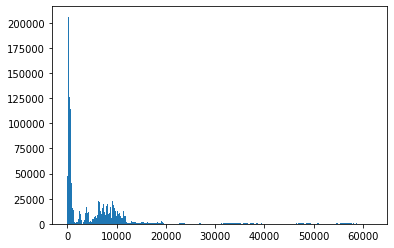

High


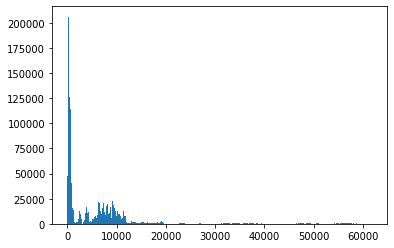

Low


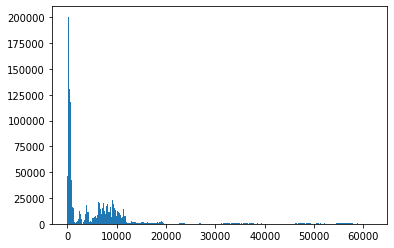

Close


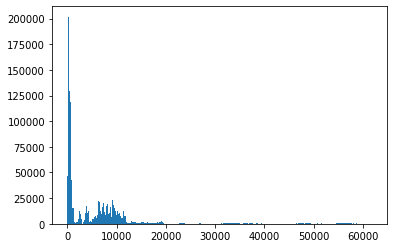

Volume_(BTC)


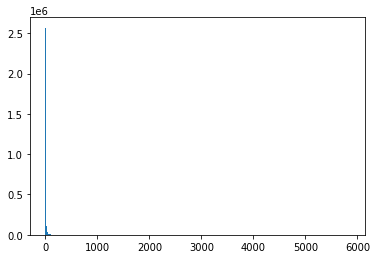

Volume_(Currency)


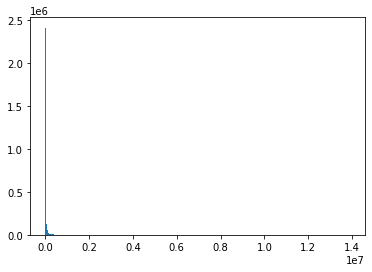

Weighted_Price


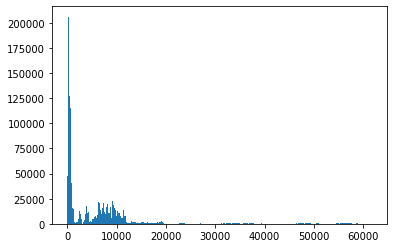

In [32]:
for i in range(len(dfB3.columns)):
  print(dfB3.columns[i])
  plt.hist(dfB3.iloc[:, i], bins=1000)
  plt.show()

Open


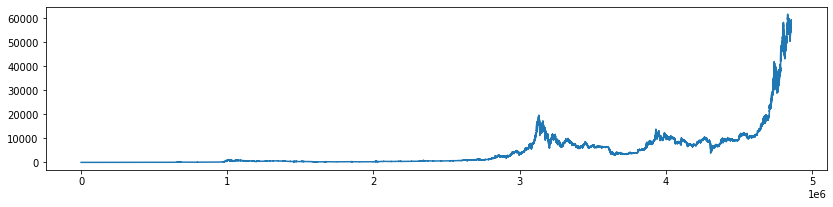

Volume_(BTC)


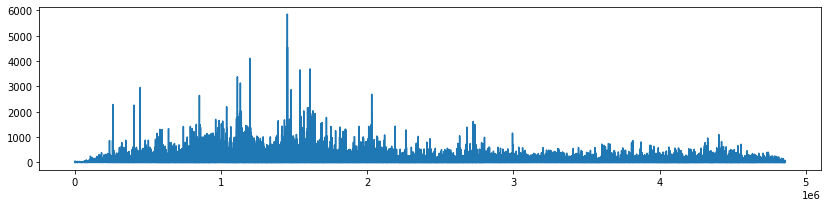

Volume_(Currency)


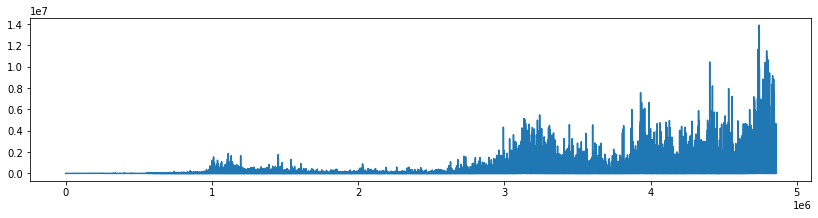

Weighted_Price


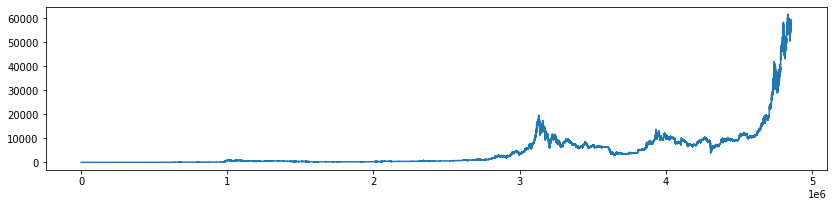

In [39]:
print("Open")
plt.figure(figsize=(14,3))
plt.plot(dfB3.iloc[:,0])
plt.show()

print("Volume_(BTC)")
plt.figure(figsize=(14,3))
plt.plot(dfB3.iloc[:,4])
plt.show()

print("Volume_(Currency)")
plt.figure(figsize=(14,3))
plt.plot(dfB3.iloc[:,5])
plt.show()

print("Weighted_Price")
plt.figure(figsize=(14,3))
plt.plot(dfB3.iloc[:,6])
plt.show()

1. 거래량 가중 평균가(VWAP, volume-weighted average price): 거래량에 가중치가 부여된 특정 기간 동안의 자산의 평균 가격
2. 코인 or 현금의 거래량이 있고, 최고 & 최저가격이 있음으로 VWAP를 제외 

In [42]:
dfB4 = dfB3.drop(columns=["Weighted_Price"])

In [44]:
raw_data = dfB4.to_numpy()
print(raw_data.shape)
print(raw_data[:6])

(3613769, 6)
[[  4.39         4.39         4.39         4.39         0.45558087
    2.00000002]
 [  4.39         4.39         4.39         4.39        48.
  210.72      ]
 [  4.5          4.57         4.5          4.57        37.86229723
  171.38033753]
 [  4.58         4.58         4.58         4.58         9.
   41.22      ]
 [  4.58         4.58         4.58         4.58         1.502
    6.87916   ]
 [  4.84         4.84         4.84         4.84        10.
   48.4       ]]


## normalization

In [45]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[6.17635600e+04 6.17818300e+04 6.16735500e+04 6.17818000e+04
 5.85385217e+03 1.39006724e+07]
[3.8 3.8 1.5 1.5 0.  0. ]


In [46]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[9.55314593e-06 9.55032072e-06 4.68607740e-05 4.67786657e-05
  7.78258243e-05 1.43877933e-07]
 [9.55314593e-06 9.55032072e-06 4.68607740e-05 4.67786657e-05
  8.19972877e-03 1.51589789e-05]
 [1.13342409e-05 1.24639779e-05 4.86444021e-05 4.96922158e-05
  6.46792850e-03 1.23289243e-05]
 [1.26295828e-05 1.26258477e-05 4.99415862e-05 4.98540797e-05
  1.53744914e-03 2.96532418e-06]
 [1.26295828e-05 1.26258477e-05 4.99415862e-05 4.98540797e-05
  2.56583179e-04 4.94879658e-07]]


In [47]:
preprocessed = normalized

## 데이터 샘플링

In [50]:
numbers = preprocessed

SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

In [51]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [52]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)

(3613758, 10, 6)
(3613758, 6)
Training Data:
(3252382, 10, 6)
(3252382, 6)
Test Data:
(361376, 10, 6)
(361376, 6)


In [57]:
print(train_x[0].T[0].shape)
print(train_x[0].T[1].shape)

(10,)
(10,)


train_x[0]
 [[0.21202932 0.21198377 0.21190312 0.21157796 0.00059807 0.00329259]
 [0.21158599 0.21198377 0.21190312 0.21153183 0.00066793 0.00367941]
 [0.21200973 0.21198734 0.21141408 0.21169807 0.0005557  0.00305958]
 [0.21173123 0.21166861 0.21136252 0.21131153 0.00078271 0.00430385]
 [0.21102786 0.21173563 0.21086684 0.21049736 0.00411942 0.02261994]
 [0.21053013 0.21152131 0.21083716 0.21071151 0.00300469 0.01648124]
 [0.21158227 0.21152228 0.21082857 0.21045916 0.00239764 0.01316525]
 [0.21049191 0.21061759 0.2107736  0.21040429 0.00382955 0.02096947]
 [0.21043702 0.21116277 0.21073728 0.21119224 0.00109115 0.00597727]
 [0.2104822  0.21111907 0.21073679 0.21113235 0.00061056 0.00334972]]

train_y[0]
 [0.21040351 0.21124435 0.21060707 0.21127382 0.00119024 0.00652311]


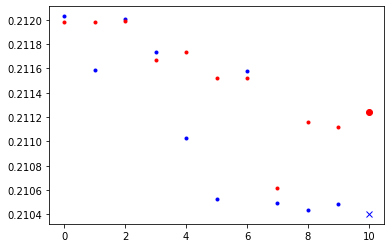

In [53]:
print("train_x[0]\n", train_x[0])
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

## RNN 학습

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69120     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 69,894
Trainable params: 69,894
Non-trainable params: 0
_________________________________________________________________


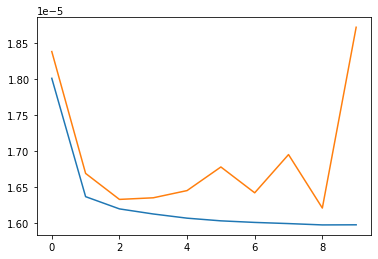

11293/11293 [==============================] - 32s 3ms/step - loss: 1.8414e-05 - mape: 5719.4512
loss= 1.8414377336739562e-05
mape= 5719.451171875


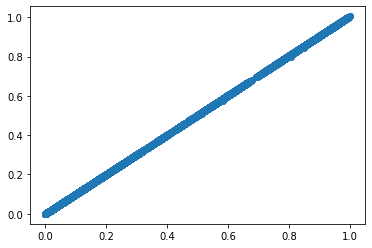

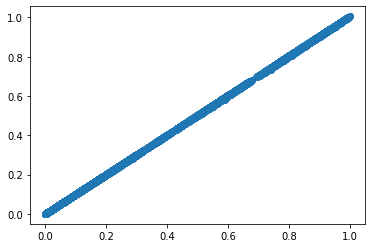

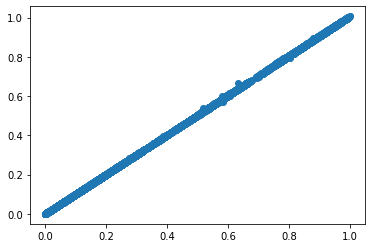

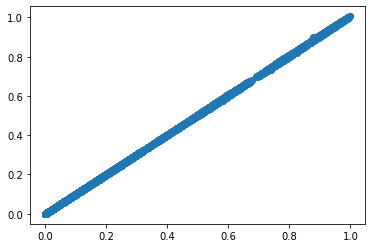

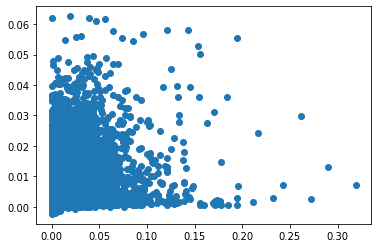

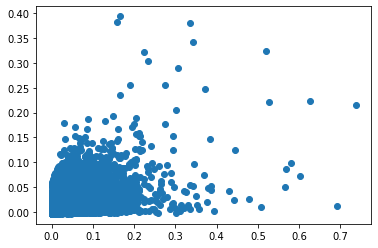

In [58]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## 테스트 데이터와 비교

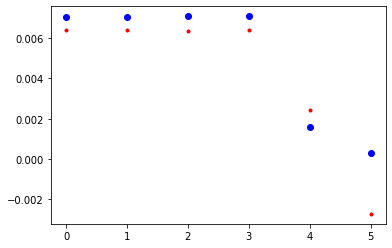

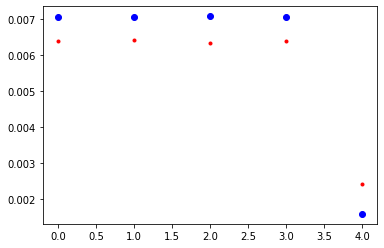

In [69]:
plt.plot(test_y[0], 'bo')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'bo')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [60]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

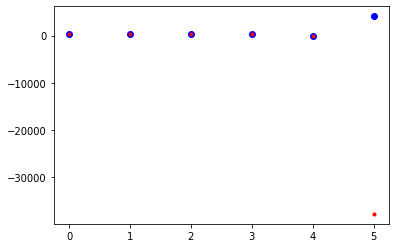

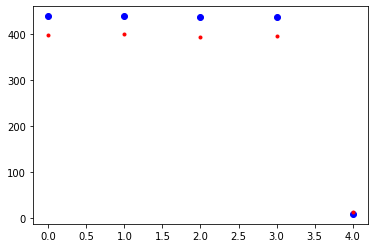

In [63]:
plt.plot(denomalized_test_y[0], 'bo')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'bo')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

## 피드백
1. 시간이 너무 오래 걸림(학습만 1시간)
2. 결측치를 더 상세히 뜯어보고, 처리 방벙을 생각

# 두번째 시도

## 결측치 분포 파악

In [10]:
dfB.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [11]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = dfB.Timestamp.quantile(q)
    null_count = dfB[(dfB.Timestamp>=last_quantile) & (dfB.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile


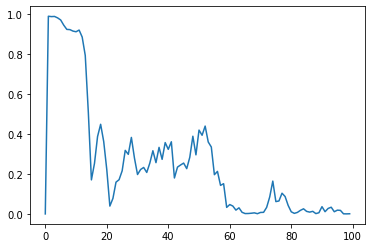

In [12]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(dfB)*100.)
plt.show()

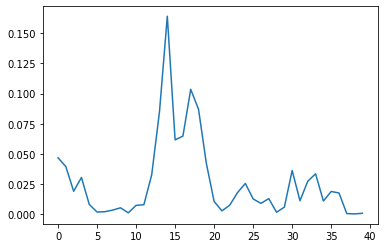

In [79]:
plt.plot(null_counts[60:]/len(dfB)*100.)
plt.show()

대게 결측치가 0.2를 넘지 말아야하는데.....
1. 0.2를 넘는 부분은 과감히 제거
2. 나머지 결측치는 연속성을 위해서 앞의 값으러 대체
3. 대략 60% 이후의 데이터에서 결측 데이터가 0.2를 안넘는 모습을 보임

## 데이터 슬라이싱

In [80]:
index_of_60_percent = int( len(dfB) * 0.6 )
dfBi = dfB[dfB.index>index_of_60_percent]
print(len(dfBi))

1942950


약 2백만 개의 데이터도 충분하지 않을까...?

## 결측치 처리 및 불필요 feature 삭제

In [81]:
print(dfBi.isnull().sum())

Timestamp                0
Open                 50146
High                 50146
Low                  50146
Close                50146
Volume_(BTC)         50146
Volume_(Currency)    50146
Weighted_Price       50146
dtype: int64


In [82]:
dfBi2 = dfBi.fillna(method="ffill")

데이터의 연속성을 그나마 유지하기 위해서 앞데이터로 값을 채우기로 생각

In [83]:
dfBi2.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [84]:
dfBi3 = dfBi2.drop(columns=["Timestamp", "Weighted_Price"])

## 넘파이 변환 및 정규화

In [85]:
raw_data = dfBi3.to_numpy()
print(raw_data.shape)

(1942950, 6)


In [86]:
print(raw_data[:6])

[[2.62504000e+03 2.62504000e+03 2.62424000e+03 2.62424000e+03
  9.68540985e+00 2.54230919e+04]
 [2.62400000e+03 2.62502000e+03 2.62200000e+03 2.62399000e+03
  6.09351659e+01 1.59882396e+05]
 [2.62100000e+03 2.62199000e+03 2.61800000e+03 2.61800000e+03
  4.14244827e+00 1.08499979e+04]
 [2.61800000e+03 2.62196000e+03 2.61800000e+03 2.61801000e+03
  7.85285476e+00 2.05747316e+04]
 [2.61800000e+03 2.62119000e+03 2.61800000e+03 2.62099000e+03
  1.07528980e-01 2.81819986e+02]
 [2.62119000e+03 2.62119000e+03 2.61999000e+03 2.61999000e+03
  1.89086800e-02 4.95525525e+01]]


In [88]:
maxs = raw_data.max(axis=0)
mins = raw_data.min(axis=0)

normalized = (raw_data - mins) / (maxs - mins)

## 데이터 샘플링

In [89]:
preprocessed = normalized
numbers = preprocessed

SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

In [90]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [92]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)

(1942939, 10, 6)
(1942939, 6)
Training Data:
(1554351, 10, 6)
(1554351, 6)
Test Data:
(388588, 10, 6)
(388588, 6)


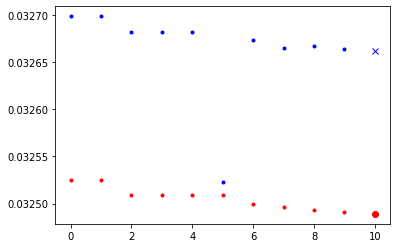

In [93]:
plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')
plt.show()

## 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               69120     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 69,894
Trainable params: 69,894
Non-trainable params: 0
_________________________________________________________________


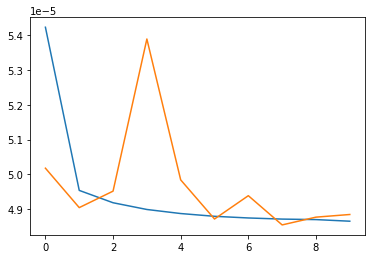

12144/12144 [==============================] - 33s 3ms/step - loss: 4.8326e-05 - mape: 926.0451
loss= 4.832557897316292e-05
mape= 926.0451049804688


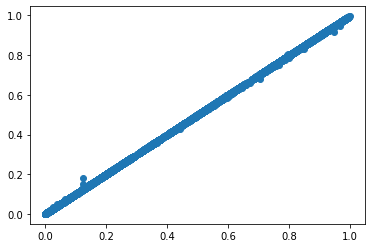

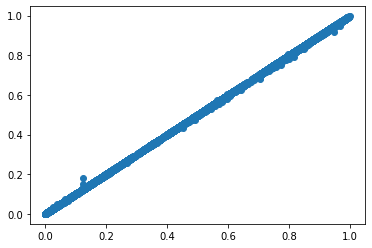

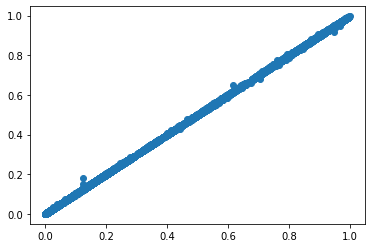

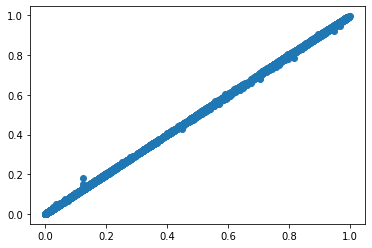

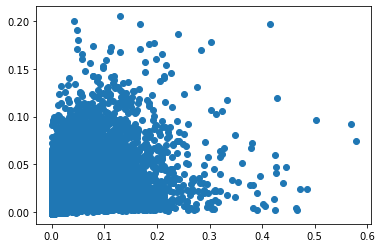

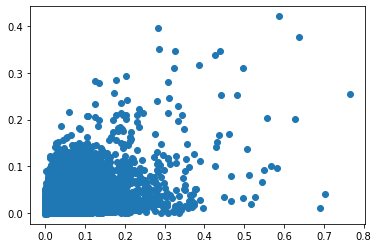

In [94]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## 에측값 비교

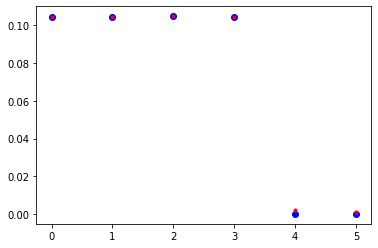

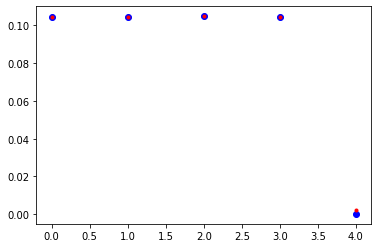

In [95]:
plt.plot(test_y[0], 'bo')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'bo')
plt.plot(y_[0,:-1], 'r.')
plt.show()

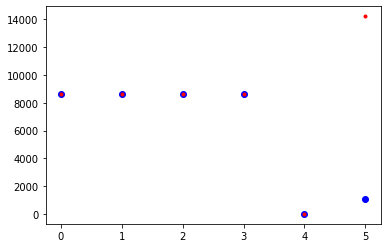

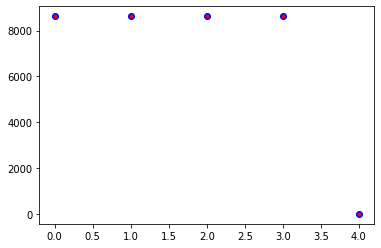

In [96]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins

plt.plot(denomalized_test_y[0], 'bo')
plt.plot(denomalized_y_[0], 'r.')
plt.show()

plt.plot(denomalized_test_y[0,:-1], 'bo')
plt.plot(denomalized_y_[0,:-1], 'r.')
plt.show()

## 피드백 

1. loss 값은 올랐다.
2. 하지만 mape 값은 세자리로 내려갔다.
3. mape을 2자리로 만들도록 시도

# 세번째 시도

In [14]:
index_of_60_percent = int( len(dfB) * 0.6 )
dfBit = dfB[dfB.index>index_of_60_percent]
print(len(dfBit))

1942950


In [15]:
dfBit = dfBit.fillna(method="ffill")

In [16]:
dfBit.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [17]:
dfBit = dfBit.drop(columns=["Timestamp", "Weighted_Price"])

In [18]:
dfBit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942950 entries, 2914427 to 4857376
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Open               float64
 1   High               float64
 2   Low                float64
 3   Close              float64
 4   Volume_(BTC)       float64
 5   Volume_(Currency)  float64
dtypes: float64(6)
memory usage: 103.8 MB


## 모든 컬럼 로그화

In [19]:
dflog = np.log(dfBit+1)

## 값 분포 확인(로그화)

Open


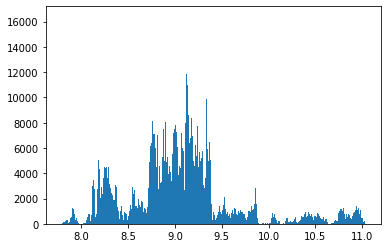

High


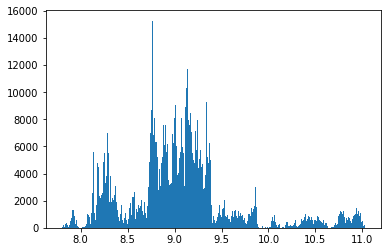

Low


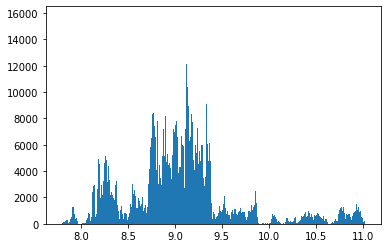

Close


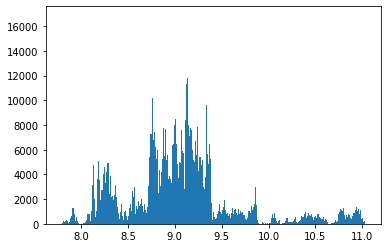

Volume_(BTC)


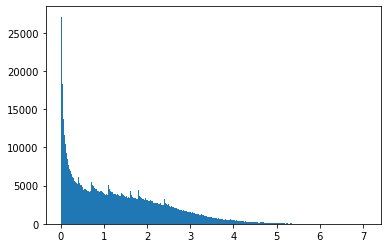

Volume_(Currency)


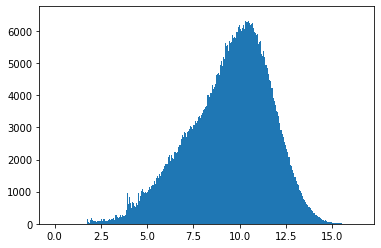

In [21]:
for i in range(len(dflog.columns)):
  print(dflog.columns[i])
  plt.hist(dflog.iloc[:,i], bins=1000)
  plt.show()

확실 좀 더 정규분포 스러워 졌다.

In [22]:
raw_data = dflog.to_numpy()
print(raw_data.shape)

(1942950, 6)


In [24]:
maxs = raw_data.max(axis=0)
mins = raw_data.min(axis=0)

normalized = (raw_data - mins) / (maxs - mins)

preprocessed = normalized

SEQUENCE_LENGTH = 10
OFFSET = 1
BATCH_SIZE = 32

In [26]:
numbers = preprocessed

raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [27]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)

(1942939, 10, 6)
(1942939, 6)
Training Data:
(1554351, 10, 6)
(1554351, 6)
Test Data:
(388588, 10, 6)
(388588, 6)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69120     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 69,894
Trainable params: 69,894
Non-trainable params: 0
_________________________________________________________________


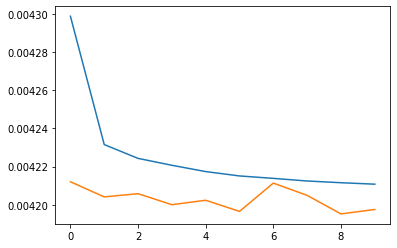

12144/12144 [==============================] - 33s 3ms/step - loss: 0.0042 - mape: 261.5464
loss= 0.004183926619589329
mape= 261.54644775390625


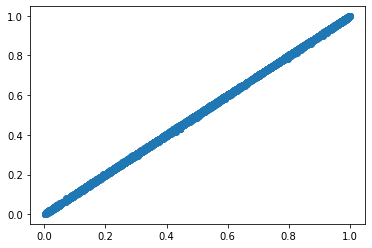

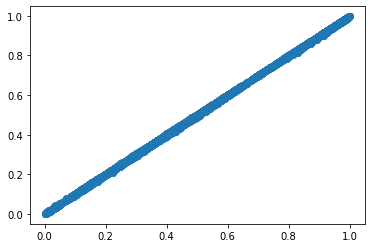

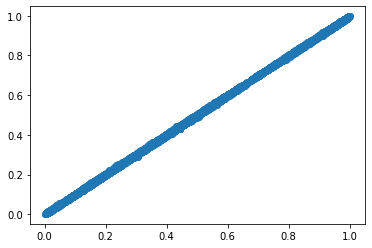

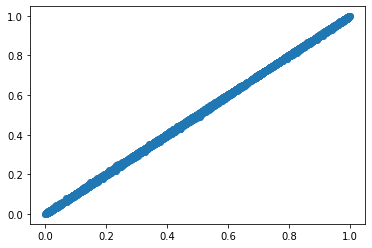

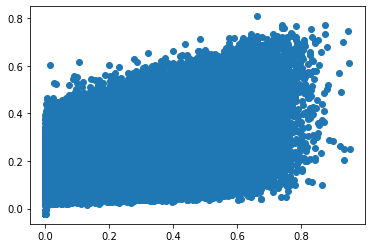

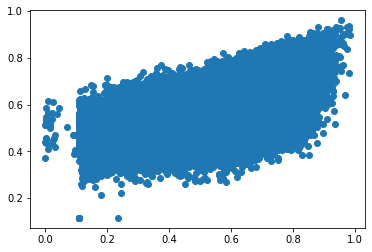

In [28]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## 피드백 
1. mape 260
2. 모델의 문제?
3. window, offset, batchsize, 샘플링 을 조절?
다음시간에....